<b> Overlap of sample and population eigenvectors for sample covariance matrices with power-law noise</b>

In this note we examine the behavior of the following sample covariance matrix.  Let $Z$ be an $N \times M$ matrix of iid Gaussians with variance $1$.  We construct the following vector $\gamma_i$ from the $M$ quantiles of the measure, (note the prefactor $64$ is the normalization constant)
$$
d F ( t ) = 64 (1 - t)^3 \mathbb{1}_{ \{ \frac{1}{2} < t <1 \} } dt
$$
via
$$
\frac{i-1}{N} = \int_{ \gamma_i}^{1} d F (t), \qquad \gamma_i = 1 - \frac{1}{2} \left( \frac{i-1}{N} \right)^{\frac{1}{4} }
$$
We construct the matrix $X$ with entries $X_{ij} = Z_{ij}\sqrt{ \gamma_j } $.  The sample covariance matrix we examine is then,
$$
H := \frac{1}{N} X^* X.
$$
Importantly, the population covariance matrix $\Sigma$ is diagonal with $i$th entry equal to $\gamma_i$.  Its spectral distribution converges to $F$.

Recall the function $\psi$ defined by
$$
\psi( \alpha ) = \alpha + \gamma \alpha \int \frac{ t d F (t) }{ \alpha - t }, \qquad \gamma = \frac{M}{N}.
$$
If we have the inequality,
$$
0 < \psi' (1) = 1 - \gamma \int \frac{ t^2 d F (t) }{ (1-t)^2} = 1 - \gamma \frac{11}{3},
$$
then the limiting DOS of $H$ has a power law tail.  Else, it has a square-root tail.

We are interested in the overlap of the top few sample eigenvectors with the population eigenvectors (which are just coordinate vectors).  From the theory, the right spectral edge is,
$$
\psi (1) = 1+5 \gamma/3,
$$
and the overlap function at the spectral edge (for lack of better terminology) is,
$$
\frac{1 \psi' (1) }{ \psi (1) } = \frac{1 - \frac{11 \gamma}{3} } { 1+ \frac{5 \gamma}{3} }
$$

<b>1.</b> First we simulate the above matrix with $N=100$ and $M=500$, $n=200$ times.  Here, $\gamma = 1/5$ which ensures the power law tail in the limiting DoS.

In [1]:
import main
import imp
import numpy as np
imp.reload(main)
N=2500
M=500
n=200
eigenvalues = np.zeros((n, M))
eigenvectors = np.zeros((n, M, M))
minor_eig = np.zeros((n, M-1))
for i in range(n):
    U, S, V, S2 = main.powerTailWishart(N, M)
    eigenvalues[i, :] = S
    eigenvectors[i, :, :] = V
    minor_eig[i, :] = S2


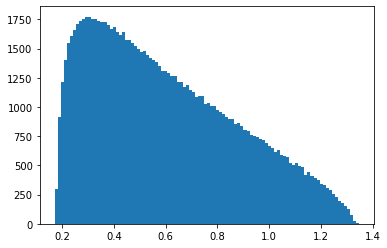

In [2]:
import matplotlib.pyplot as plt
plt.hist(eigenvalues.flatten(), bins=100)
plt.show()

<b>2.</b> Here is a histogram of the quantiles $\gamma_i$.

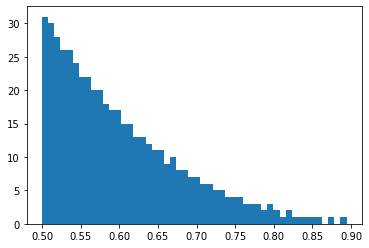

In [3]:
imp.reload(main)
gam = main.makeGamma(M)
plt.hist(gam, bins=50)
plt.show()

<b>3.</b> The limiting value of the overlap between population and sample eigenvectors for population eigenvalues at $1$ is
$$
\frac{1 \psi' (1) }{ \psi (1) } = \frac{1 - \frac{11 \gamma}{3} } { 1+ \frac{5 \gamma}{3} } = 0.2
$$
Below we report the average squared overlap over the $n=200$ trials of the sample and population eigenvalues for the largest $10$ eigenvalues, and plot the values against the average sample eigenvalue position.

The squared overlap should be compared to the value $M^{-1} = 0.002$ which is the value for a totally delocalized vector.

Overlaps of the top 10 eigenvectors in descending order: [0.04596004 0.02806983 0.01612276 0.01454201 0.01309377 0.0097396
 0.01055247 0.00872251 0.00917393 0.00741726]


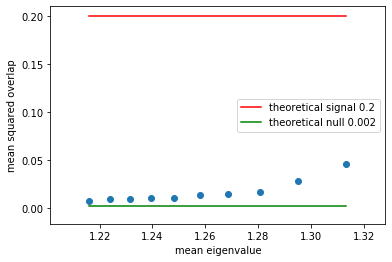

In [4]:
V = np.einsum('ijj->ij', eigenvectors[:, 0:10, 0:10])
V = np.power(V, 2.0)
vec_mean = np.mean(V, axis=0)
eig_mean = np.mean(eigenvalues[:, 0:10], axis=0)
print('Overlaps of the top 10 eigenvectors in descending order:', vec_mean)
plt.scatter(eig_mean, vec_mean)
plt.xlabel('mean eigenvalue')
plt.ylabel('mean squared overlap')
plt.plot(eig_mean, 0.2*np.ones(10), color='red', label='theoretical signal 0.2')
plt.plot(eig_mean, 0.002*np.ones(10), color='green', label='theoretical null 0.002')
plt.legend()
plt.show()

<b>4.</b> The next question is whether we can "predict" the blue dots in the above plot.  The theoretical limit is the function,
$$
\eta (p) := \frac{ p \psi' ( p ) }{ \psi (p)}.
$$
However, this works only for $p > 1$.  We want to try to make up for this finite $N$ effect; when $p = \gamma_i$, a quantile, let's take $F^{(i)}$ to be a discrete measure supported on the $M-1$ points $\{ \gamma_j \}_{\{ j \neq i \} }$. I.e., we leave out $\gamma_i$ from the definition of $F^{(i)}$,
$$
F^{(i)}(x) = \frac{1}{M-1} \sum_{j\neq i } \delta_{j} (x)
$$

In [5]:
imp.reload(main)
theorN = np.zeros(10)
for i in range(10):
    theorN[i] = main.eta_dropout(i, M, N)
theorN

array([ -1.24464626,  -2.3447672 ,  -3.4938212 ,  -4.69086795,
        -5.92843253,  -7.19960542,  -8.49869729,  -9.82109912,
       -11.16306127, -12.52150501])

In [ ]:
import main
import imp
import numpy as np
imp.reload(main)
N=25000
M=5000
n=1
eigenvalues = np.zeros((n, M))
eigenvectors = np.zeros((n, M, M))
minor_eig = np.zeros((n, M-1))
for i in range(n):
    U, S, V, S2 = main.powerTailWishart(N, M)
    eigenvalues[i, :] = S
    eigenvectors[i, :, :] = V
    minor_eig[i, :] = S2


In [5]:
import matplotlib.pyplot as plt
import main
import imp
imp.reload(main)
import numpy as np

N = 500
M = 100
gamma = M/N
n = 100
eig = np.zeros(n)
v = np.zeros((n, M))
est = np.zeros(n) 
for i in range(n):
    U, S, V, S2 = main.powerTailWishart(N, M)
    eig[i]=S[0]
    dif = S[0] -S2
    
    dif = 1 / dif
    es = gamma*np.mean(dif)*S[0] + (1 - gamma)
    es = es / (gamma*np.mean(dif*dif)*S[0]*S[0]+ (1- gamma) )
    

    est[i] = es
    v[i, :]=np.diag(V)
v = np.power(v, 2.0)

In [6]:
np.mean(est)

0.25737789166305874

In [7]:
print('Mean v_0^2=',np.mean(v[:, 0]))
print('Mean lambda_1=',np.mean(eig))

Mean v_0^2= 0.29530230888395537
Mean lambda_1= 1.336313963647686


In [126]:
imp.reload(main)
1.001*main.psider(1.001)/main.Hemp(1.001)

0.2395818397509247

In [7]:
import matplotlib.pyplot as plt
import main
import imp
imp.reload(main)
import numpy as np

N = 2500
M = 500
gamma = M/N
n = 200

spikes = np.array([0.92, 0.94, 0.96, 0.98, 1, 1.2, 1.4, 1.6, 1.8, 2.0])-1.0
eigs = {}
v1 = {}
v2 = {}

for spike in spikes:
    eigs[str(spike)] = np.zeros(n)
    v1[str(spike)] = np.zeros((n, 10))
    v2[str(spike)] = np.zeros((n, 10))
    for i in range(n):
        U, S, V = main.powerLawSpiked(N, M, spike)
        eigs[str(spike)][i]=S[0]
        v1[str(spike)][i, :]= V[0, 0:10]
        v2[str(spike)][i, :]=V[1, 0:10]


In [8]:
v11 = np.zeros(len(spikes))
for i, spike in enumerate(spikes):
    v11[i] = np.mean(np.power(v1[str(spike)][:, 0], 2.0))

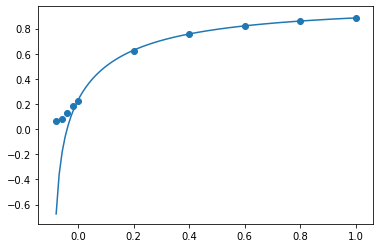

In [14]:
imp.reload(main)
x = np.arange(101)/100*1.08-0.08+1
y = np.zeros(len(x))
for i in range(len(x)):
    y[i] = main.eta(x[i])
plt.scatter(spikes, v11)
plt.plot(x-1, y)
plt.show()

In [15]:
J = np.array([])
for i in range(100):
    U, S, V = main.powerLawSpiked(N, M, 0.0)
    J = np.append(J, S)

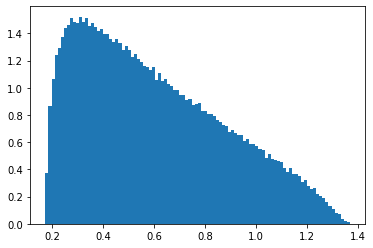

In [17]:
plt.hist(J, density=True, bins=100)
plt.show()

In [43]:
import main
import imp
import numpy as np
imp.reload(main)
N=1250
M=500
n=200
eigenvalues = np.zeros((n, M))
eigenvectors = np.zeros((n, M, M))
for i in range(n):
    U, S, V, = main.randWish(N, M, main.makevar())
    eigenvalues[i, :] = S
    eigenvectors[i, :, :] = V


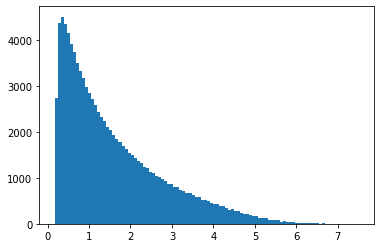

In [44]:
import matplotlib.pyplot as plt
plt.hist(eigenvalues.flatten(), bins=100)
plt.show()

In [45]:
k=10
eigs = np.zeros((n,k))
vecs = np.zeros((n, k))
for i in range(n):
    eigs[i, :] = eigenvalues[i, 0:k]
    vecs[i, :] = np.diag(eigenvectors[i, 0:k,0:k])

vecs = np.power(vecs, 2)

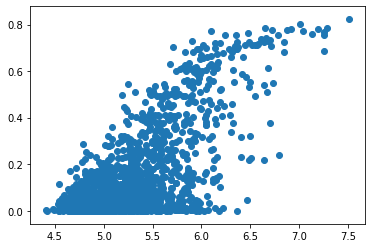

In [46]:
plt.scatter(eigs.flatten(), vecs.flatten())

In [47]:
k=1
eigs = np.zeros((n,k+1))
vecs = np.zeros((n, k))
for i in range(n):
    eigs[i, :] = eigenvalues[i, 0:k+1]
    vecs[i, :] = np.diag(eigenvectors[i, 0:k,0:k])
dif = eigs[:, 0]-eigs[:, 1]
vecs = np.power(vecs, 2)

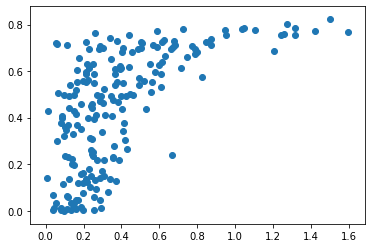

In [48]:
plt.scatter(dif.flatten(), vecs.flatten())

In [49]:
imp.reload(main)
lambs = eigenvalues[30, :]
var = np.zeros(n)
for i in range(n):
    lambs = eigenvalues[i, :]
    var[i] = main.var_est(lambs, N, M, n=100)


beta: 1.0470668972154615
beta: 0.9735204334242262
beta: 0.798299967036649
beta: 1.0989986257905489
beta: 0.8614930359910279
beta: 0.8946719527869549
beta: 0.6522348951698629
beta: 0.6208319987275476
beta: 0.8157062454840475
beta: 1.0206694078002996
beta: 1.0135351498295804
beta: 0.8601484994779002
beta: 0.8966382402589119
beta: 0.7832526228277554
beta: 0.845955177797306
beta: 0.8936631215372836
beta: 0.623154015839823
beta: 0.6841652559601437
beta: 0.9176157756552002
beta: 0.8878020823553955
beta: 0.6901612979601321
beta: 0.9235085577150034
beta: 0.911366565256816
beta: 1.0328447997909735
beta: 0.7192825823498111
beta: 0.7132996084684854
beta: 0.6868521096824323
beta: 0.8096190357435693
beta: 0.4928742528173202
beta: 1.5609537366406057
beta: 0.8593139920179302
beta: 0.6783451362538188
beta: 0.8625374876392632
beta: 1.1177292487694648
beta: 0.6303167841173672
beta: 0.8343369286642446
beta: 0.642308536742129
beta: 0.8482481766676252
beta: 1.0182681787342636
beta: 1.0489514799120054
beta:

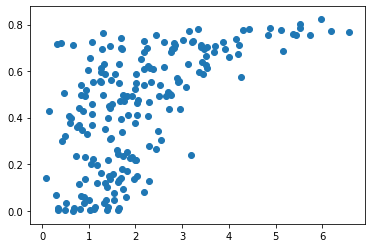

In [50]:
plt.scatter(dif.flatten()/ np.sqrt(var.flatten()), vecs.flatten())

In [9]:
imp.reload(main)
preds = np.zeros(n)
for i in range(n):
    preds[i] = main.m_est(np.append(eigenvalues[i, :], np.zeros(N-M)), 0)

In [34]:
I = np.where(dif.flatten() / np.sqrt(var.flatten())<0.5)[0]
np.mean(np.abs(vecs.flatten()-preds)[I])

0.2501992977024864

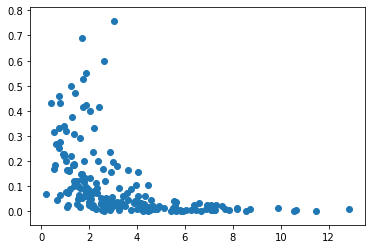

In [29]:
plt.scatter(dif.flatten() / np.sqrt(var.flatten()), np.abs(vecs.flatten()-preds))


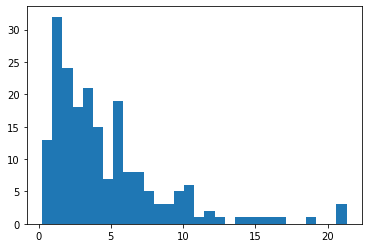

In [9]:
gaps = eigenvalues[:, 0]-eigenvalues[:, 1]
plt.hist(gaps, bins=30)
plt.show()

In [76]:
samp = eigenvalues[25, :]
eigenvalues.shape

(200, 500)

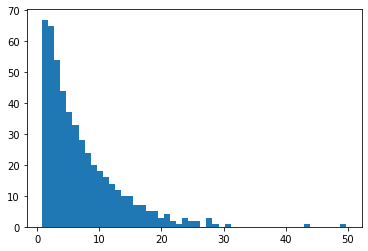

array([49.81766046, 43.72009418, 30.58867105, 28.4668096 , 27.98664653,
       27.68481309, 27.32453284, 26.01286406, 25.3667057 , 24.79927341,
       24.50022988, 24.04345102, 23.50738408, 23.33272016, 22.5436823 ,
       22.08908055, 21.58288249, 21.2525033 , 21.18689415, 20.74098033,
       20.51930025, 20.16088952, 19.95622003, 19.51591616, 19.34819145,
       19.11781403, 18.83406363, 18.70881297, 18.43014505, 18.3747291 ,
       18.05972674, 17.91446191, 17.8275465 , 17.48634691, 17.31773836,
       17.16068901, 17.08782219, 17.03677346, 16.84892787, 16.6912599 ,
       16.55345374, 16.39459156, 16.26419907, 16.07736112, 16.02321368,
       15.9344215 , 15.70039726, 15.56341856, 15.43297395, 15.41087113,
       15.25433456, 15.12412975, 14.97351577, 14.83865012, 14.76629483,
       14.71096905, 14.6151424 , 14.49219656, 14.31062612, 14.23609624,
       14.16506281, 14.08591242, 13.99419264, 13.90841947, 13.85160138,
       13.77229954, 13.6583895 , 13.53786982, 13.49445699, 13.33

In [75]:
plt.hist(samp, bins=50)
plt.show()
samp

In [71]:
imp.reload(main)
a, b, h, c, edges = main.fitter(samp)
fits = np.power(c, a)*np.exp(b)

In [86]:
eee = eigenvalues[:, 0]-eigenvalues[:, 1:500].transpose()
eee = eee.transpose()
hh = np.histogram(eee.flatten(), bins=edges)[0]/n

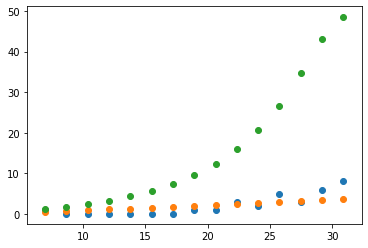

In [87]:
plt.scatter(c, h)
plt.scatter(c, fits)
plt.scatter(c, hh)
plt.show()

In [43]:
h, b = np.histogram(rest,20)
h.shape
b.shape

(21,)

In [56]:
hh = np.histogram(eigenvalues.flatten(), bins=edges)

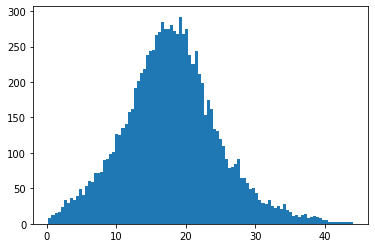